In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('GAS_dropna.csv', index_col = "Date", parse_dates = True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-21,30833.333984,34250.000000,30833.333984,34166.667969,32736.435547,3002495.0
2012-05-22,35833.332031,35833.332031,35416.667969,35833.332031,34333.332031,5801459.0
2012-05-23,35750.000000,35833.332031,34083.332031,34083.332031,32656.587891,1266935.0
2012-05-24,32500.000000,33333.332031,32416.666016,32416.666016,31059.689453,1211255.0
2012-05-25,32416.666016,33166.667969,30916.666016,32500.000000,31139.535156,1112711.0
...,...,...,...,...,...,...
2024-05-20,76100.000000,76800.000000,76000.000000,76000.000000,76000.000000,1110709.0
2024-05-21,76200.000000,77600.000000,76000.000000,76700.000000,76700.000000,1696938.0
2024-05-22,77300.000000,77300.000000,76500.000000,76600.000000,76600.000000,832369.0


In [ ]:
data.shape

(2995, 6)

<function matplotlib.pyplot.show(close=None, block=None)>

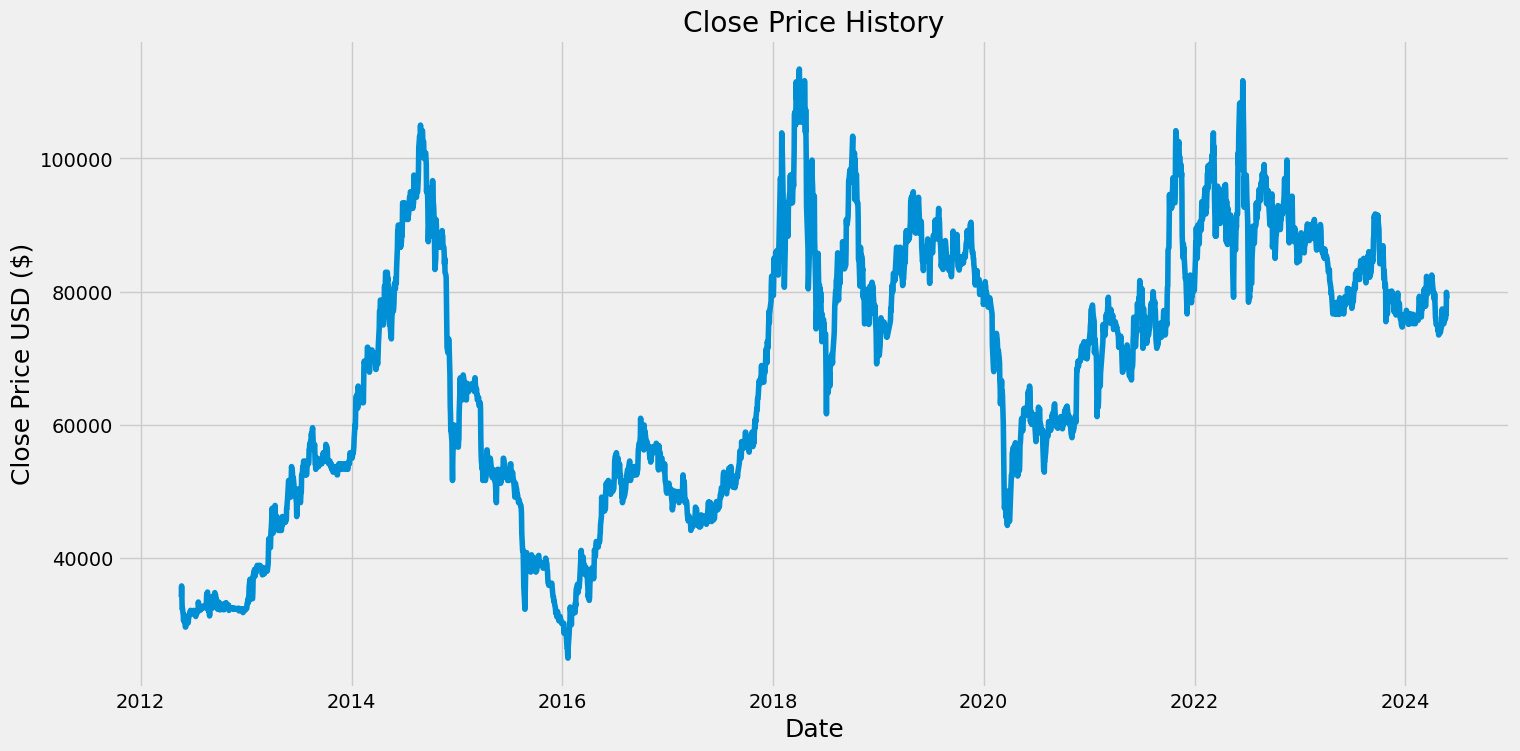

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show

In [ ]:
# Choose variables
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split data for test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 10, 15, 30, 110],
    'max_features': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'n_estimators': [50, 100, 200, 400]
}

In [ ]:
# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
Best Score: 0.9981234796470405


In [ ]:
# Use the best parameters to train a new Random Forest model
best_model = RandomForestRegressor(**grid_search.best_params_)
best_model.fit(X_train, y_train)

y_train_pred = best_model.predict(X_train)

y_test_pred = best_model.predict(X_test)

Root Mean Squared Error 505.6528393335275
R2 score: 0.9993483731672085
Root Mean Squared Error 849.8645002216415
R2 score: 0.9982831171261602


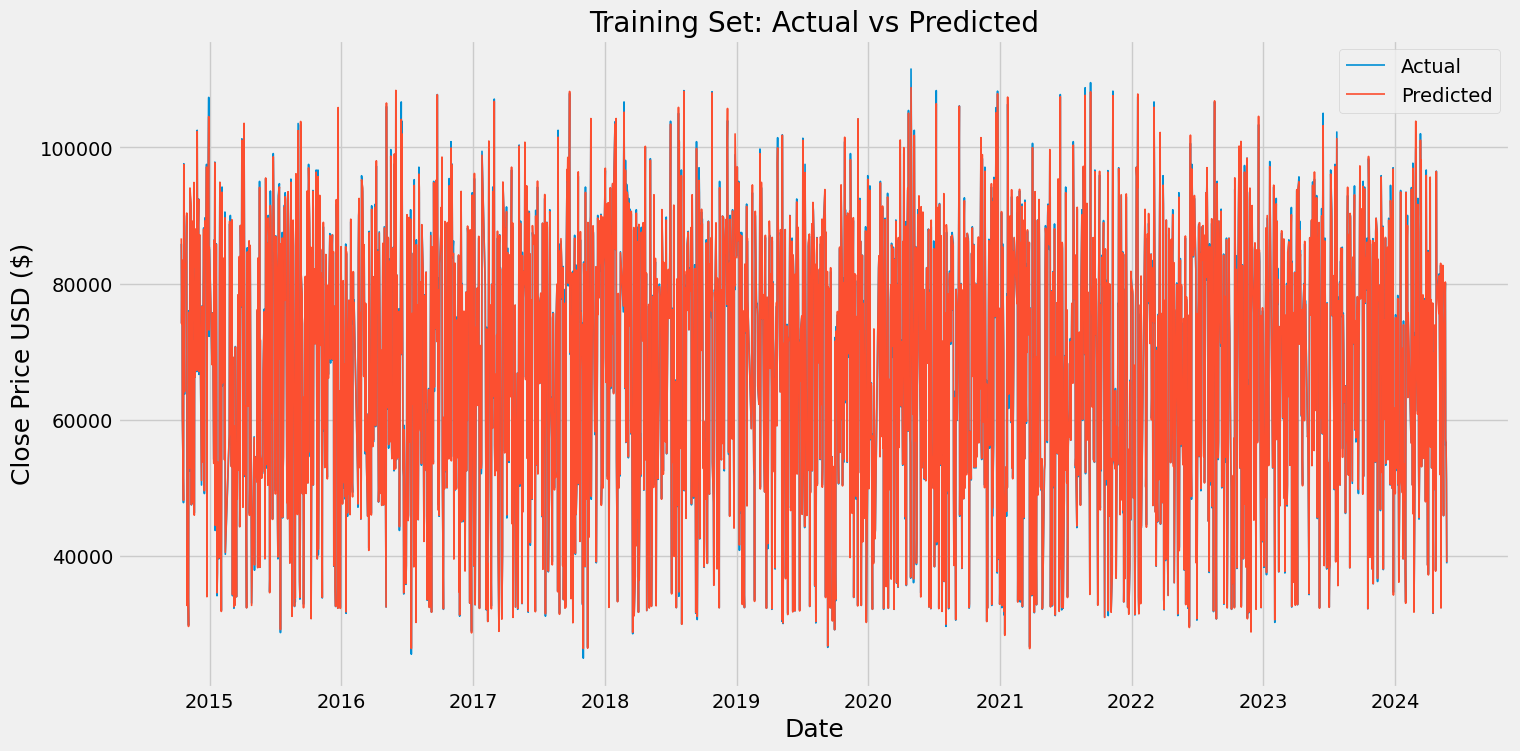

In [ ]:
# Plot the train set
plt.figure(figsize=(16,8))
plt.title('Train Set: Actual vs Predicted')
plt.plot(data.index[-len(y_train):], y_train, label='Actual', linewidth=1.2)
plt.plot(data.index[-len(y_train):], y_train_pred, label='Predicted', linewidth=1.2)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

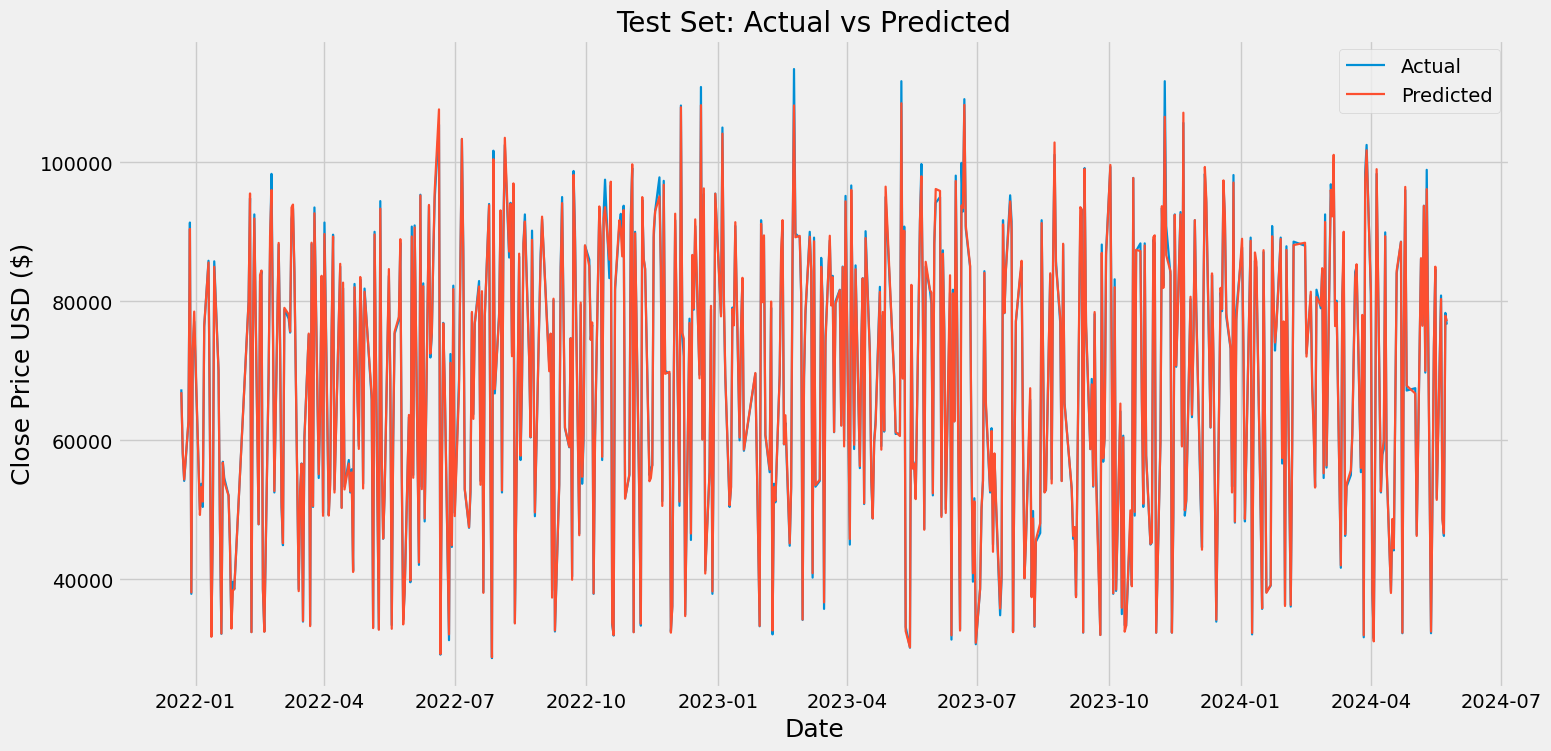

In [ ]:
# Plot the test set
plt.figure(figsize=(16,8))
plt.title('Test Set: Actual vs Predicted')
plt.plot(data.index[-len(y_test):], y_test, label='Actual', linewidth = 1.6)
plt.plot(data.index[-len(y_test):], y_test_pred, label='Predicted', linewidth = 1.6)
plt.legend()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Evaluate the model
print("Root Mean Squared Error for train set", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 score for train set:", r2_score(y_train, y_train_pred))

print("Root Mean Squared Error for test set", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R2 score for test set:", r2_score(y_test, y_test_pred))

Root Mean Squared Error for train set 505.6528393335275
R2 score for train set: 0.9993483731672085
Root Mean Squared Error for test set 849.8645002216415
R2 score for test set: 0.9982831171261602
